In [128]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt

In [129]:
file=pd.read_csv(r"C:\Users\User.DESKTOP-OQ6NE4T\Desktop\preprocessed_titanic_data\preprocessed_titanic_data.csv")

In [130]:
file


,Survived,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Pclass_1,Pclass_2,...,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7
0,0,1,0,7.2500,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,1,1,0,71.2833,True,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
2,1,0,0,7.9250,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
3,1,1,0,53.1000,False,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,False
4,0,0,0,8.0500,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,False,False
887,1,0,0,30.0000,False,False,True,False,True,False,...,False,True,False,True,False,False,False,False,False,False
888,0,1,2,23.4500,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
889,1,0,0,30.0000,True,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False


In [131]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Embarked_C  891 non-null    bool   
 5   Embarked_Q  891 non-null    bool   
 6   Embarked_S  891 non-null    bool   
 7   Embarked_U  891 non-null    bool   
 8   Pclass_1    891 non-null    bool   
 9   Pclass_2    891 non-null    bool   
 10  Pclass_3    891 non-null    bool   
 11  Sex_0       891 non-null    bool   
 12  Sex_1       891 non-null    bool   
 13  Age_0       891 non-null    bool   
 14  Age_1       891 non-null    bool   
 15  Age_2       891 non-null    bool   
 16  Age_3       891 non-null    bool   
 17  Age_4       891 non-null    bool   
 18  Age_5       891 non-null    bool   
 19  Age_6       891 non-null    b

In [132]:
file.describe()

,Survived,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.523008,0.381594,32.204208
std,0.486592,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,7.910400
50%,0.000000,0.000000,0.000000,14.454200
75%,1.000000,1.000000,0.000000,31.000000
max,1.000000,8.000000,6.000000,512.329200


In [133]:
numeric_file=file

<Axes: >

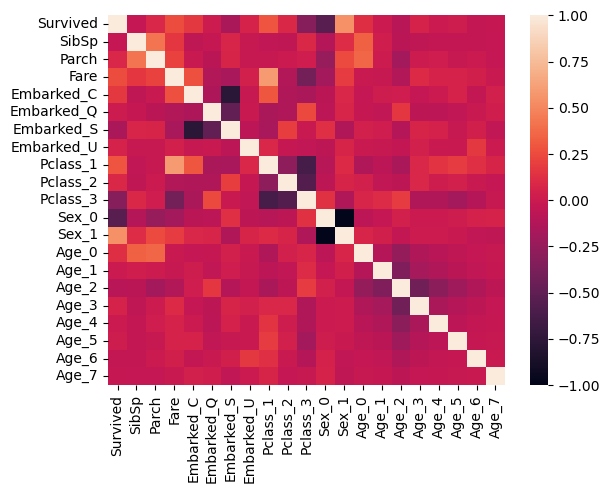

In [134]:
sns.heatmap(numeric_file.corr())

In [135]:
label=file['Survived']
features = file.drop(columns=['Survived'])

In [136]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [137]:
from sklearn.model_selection import train_test_split


In [138]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.7,random_state=50)

In [139]:
model.fit(x_train,y_train)

c:\Users\User.DESKTOP-OQ6NE4T\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
y_predict=model.predict(x_test)

In [141]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: ",accuracy)

Accuracy:  0.8076923076923077


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       385
           1       0.80      0.67      0.73       239

    accuracy                           0.81       624
   macro avg       0.81      0.78      0.79       624
weighted avg       0.81      0.81      0.80       624

Accuracy: 0.8076923076923077


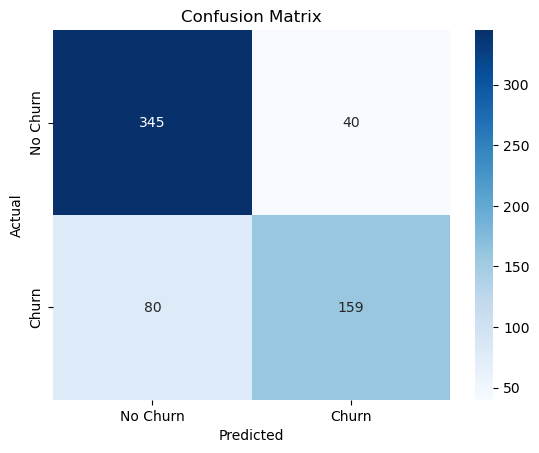

In [142]:
# Print classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_predict))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_predict))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [143]:
model_=LogisticRegression(multi_class='multinomial')
model_.fit(x_train,y_train)

c:\Users\User.DESKTOP-OQ6NE4T\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [144]:
model_.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [145]:
model_.score(features,label)

0.8069584736251403

In [146]:
y_predict_=model_.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score

accuracy_ = accuracy_score(y_test, y_predict_)
print("Accuracy: ",accuracy_)

Accuracy:  0.8141025641025641


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       385
           1       0.81      0.67      0.74       239

    accuracy                           0.81       624
   macro avg       0.81      0.79      0.80       624
weighted avg       0.81      0.81      0.81       624

Accuracy: 0.8141025641025641


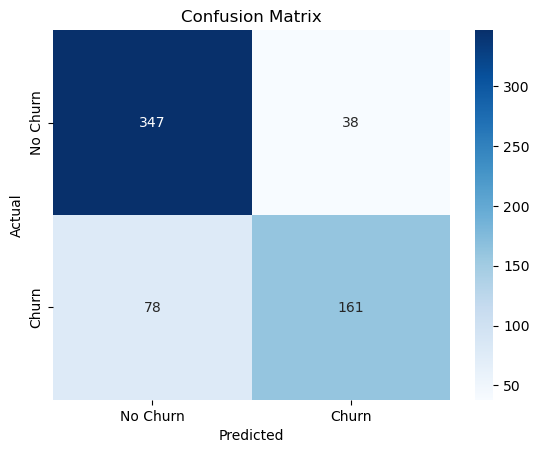

In [148]:
# Print classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_predict_))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_predict_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict_)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [149]:
from sklearn import svm

In [150]:
model_1=svm.SVC()

In [151]:
model_1.fit(x_train,y_train)

SVC()

In [152]:
model_1.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [153]:
model_1.score(features,label)

0.6666666666666666

In [154]:
model_2=svm.SVC(kernel='linear',degree=3)

In [155]:
model_2.fit(x_train,y_train)

SVC(kernel='linear')

In [156]:
y_predict_2=model_2.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score

accuracy_2 = accuracy_score(y_test, y_predict_2)
print("Accuracy: ",accuracy_2)

Accuracy:  0.8060897435897436


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       385
           1       0.79      0.68      0.73       239

    accuracy                           0.81       624
   macro avg       0.80      0.78      0.79       624
weighted avg       0.80      0.81      0.80       624

Accuracy: 0.8060897435897436


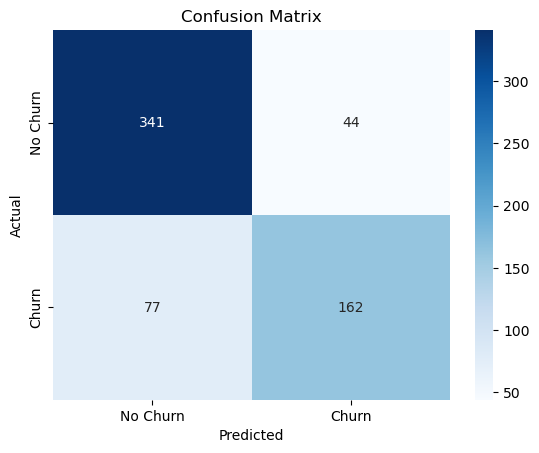

In [158]:

# Print classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_predict_2))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_predict_2))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict_2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
